## loading data

In [1]:
%matplotlib inline

# data manipulation and math

import numpy as np
import scipy as sp
import pandas as pd
# plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns
#preprocessing
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import os

In [2]:
df = pd.read_csv("../data/wine_df_eda.csv")
df.head()


,Unnamed: 0,wine_type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,free_SO2_ratio,alcohol_surgar_ratio,sugar_acidity_ratio,fixed_acidity_ratio
0,0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,32.352941,494.736842,23.456790,91.358025
1,1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,37.313433,376.923077,29.953917,89.861751
2,2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,27.777778,426.086957,26.869159,91.121495
3,3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,28.333333,515.789474,16.550523,97.560976
4,4,red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,32.500000,522.222222,22.332506,91.811414


In [3]:
df.drop(df.columns[[0]], inplace=True, axis=1)
df.head()

,wine_type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,free_SO2_ratio,alcohol_surgar_ratio,sugar_acidity_ratio,fixed_acidity_ratio
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,32.352941,494.736842,23.456790,91.358025
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,37.313433,376.923077,29.953917,89.861751
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,27.777778,426.086957,26.869159,91.121495
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,28.333333,515.789474,16.550523,97.560976
4,red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,32.500000,522.222222,22.332506,91.811414


## Preprocess categorical features

In [4]:
new_df = pd.get_dummies(df,drop_first = True,dtype='int' )
new_df.tail(20)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,free_SO2_ratio,alcohol_surgar_ratio,sugar_acidity_ratio,fixed_acidity_ratio,wine_type_white
5300,5.9,0.540,0.00,0.80,0.032,12.0,82.0,0.99286,3.25,0.36,8.800000,5,14.634146,1100.000000,12.422360,91.614907,1
5301,6.2,0.530,0.02,0.90,0.035,6.0,81.0,0.99234,3.24,0.35,9.500000,4,7.407407,1055.555556,13.372957,92.124814,1
5302,6.6,0.340,0.40,8.10,0.046,68.0,170.0,0.99494,3.15,0.50,9.533333,6,40.000000,117.695473,116.714697,95.100865,1
5303,5.0,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.400000,6,28.813559,80.000000,224.450812,95.510984,1
5304,5.5,0.320,0.13,1.30,0.037,45.0,156.0,0.99184,3.26,0.38,10.700000,5,28.846154,823.076923,22.336770,94.501718,1
5305,4.9,0.470,0.17,1.90,0.035,60.0,148.0,0.98964,3.27,0.35,11.500000,6,40.540541,605.263158,35.381750,91.247672,1
5306,6.5,0.330,0.38,8.30,0.048,68.0,174.0,0.99492,3.14,0.50,9.600000,5,39.080460,115.662651,121.522694,95.168375,1
5307,6.6,0.340,0.40,8.10,0.046,68.0,170.0,0.99494,3.15,0.50,9.550000,6,40.000000,117.901235,116.714697,95.100865,1
5308,6.2,0.210,0.28,5.70,0.028,45.0,121.0,0.99168,3.21,1.08,12.150000,7,37.190083,213.157895,88.923557,96.723869,1
5309,6.2,0.410,0.22,1.90,0.023,5.0,56.0,0.98928,3.04,0.79,13.000000,7,8.928571,684.210526,28.744327,93.797277,1


In [5]:
new_df["quality"] = new_df["quality"].apply(lambda x : 1 if x >=7 else 0)
new_df["quality"].value_counts()

quality
0    4311
1    1009
Name: count, dtype: int64

## feature selections for modeling

In [6]:
new_df.drop("wine_type_white",axis=1).corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.417743
fixed_acidity_ratio     0.119217
free_SO2_ratio          0.083032
alcohol_surgar_ratio    0.074231
citric_acid             0.060672
pH                      0.048330
sulphates               0.036771
free_sulfur_dioxide     0.011325
fixed_acidity          -0.049841
total_sulfur_dioxide   -0.067307
sugar_acidity_ratio    -0.077710
residual_sugar         -0.084868
volatile_acidity       -0.144361
chlorides              -0.161027
density                -0.294971
Name: quality, dtype: float64

it shows alcohol, fixed_acidity_ration are positivie correlated to quality. Also, in previous EDA, The density vs residual_sugar,density vs chlorides, density vs fixed_acidity, totol_sulfur_dioxide vs residual_sugar, free_sulfur_dioxide vs residual_sugar shows strong positive correlation. Therefore the following features will be selected for furture modeling :"alcohol","fixed_acidity_ratio", "density","residual_sugar", "chlorides","total_sulfur_dioxide"

## Scaling

In [7]:
features = new_df.drop(["quality","wine_type_white"],axis = 1)
y =new_df["quality"]
#Save the X labels 
wine_index = features.index
#Save the column names
wine_columns = features.columns
scaler= MinMaxScaler()
scale_features = scaler.fit_transform(features)

In [8]:
#Create a new dataframe from `scale-X`
X_df = pd.DataFrame(scale_features, columns=wine_columns)
X_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,free_SO2_ratio,alcohol_surgar_ratio,sugar_acidity_ratio,fixed_acidity_ratio
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.360494,0.272720,0.022507,0.532057
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.419943,0.205355,0.031240,0.439234
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.305664,0.233466,0.027094,0.517384
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.312322,0.284758,0.013225,0.916864
4,0.297521,0.386667,0.000000,0.018405,0.109635,0.041667,0.078341,0.206092,0.612403,0.191011,0.202899,0.362257,0.288436,0.020996,0.560183


In [9]:
# verify scaling
X_df.mean()

fixed_acidity           0.282246
volatile_acidity        0.176086
citric_acid             0.191864
residual_sugar          0.068228
chlorides               0.079219
free_sulfur_dioxide     0.100822
total_sulfur_dioxide    0.249099
density                 0.143152
pH                      0.391212
sulphates               0.176043
alcohol                 0.369455
free_SO2_ratio          0.316716
alcohol_surgar_ratio    0.225292
sugar_acidity_ratio     0.084430
fixed_acidity_ratio     0.785297
dtype: float64

In [10]:
X = X_df[["alcohol","fixed_acidity_ratio", "density","residual_sugar", "chlorides","total_sulfur_dioxide"]]
X

,alcohol,fixed_acidity_ratio,density,residual_sugar,chlorides,total_sulfur_dioxide
0,0.202899,0.532057,0.206092,0.019939,0.111296,0.064516
1,0.260870,0.439234,0.186813,0.030675,0.147841,0.140553
2,0.260870,0.517384,0.190669,0.026074,0.137874,0.110599
3,0.260870,0.916864,0.209948,0.019939,0.109635,0.124424
4,0.202899,0.560183,0.206092,0.018405,0.109635,0.078341
...,...,...,...,...,...,...
5315,0.463768,0.864933,0.077694,0.015337,0.049834,0.198157
5316,0.231884,0.781299,0.150183,0.113497,0.063123,0.373272
5317,0.202899,0.847271,0.104685,0.009202,0.053156,0.241935
5318,0.695652,0.757455,0.030461,0.007669,0.021595,0.239631


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                y,
                                                test_size = 0.30,
                                                random_state = 123,stratify=y)
X_train.shape, X_test.shape

((3724, 6), (1596, 6))

## resampling

In [12]:
class_counts = new_df["quality"].value_counts()
class_counts

quality
0    4311
1    1009
Name: count, dtype: int64

In [13]:
class_percentages = pd.Series([(x / new_df.shape[0]) * 100.00 for x in class_counts])

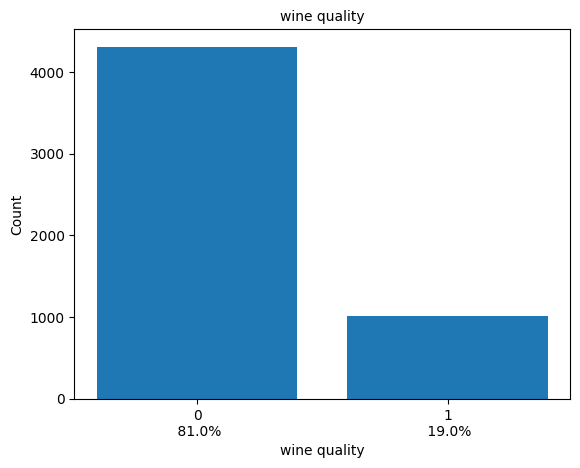

In [14]:
fig, ax = plt.subplots()
ax.bar(class_counts.index, class_counts)
ax.set_xticks([ 0,1])
ax.set_xticklabels(class_percentages.index.astype(str) + '\n' + ' ' +
                   class_percentages.round(0).astype(str) + '%')
ax.set_ylabel('Count')
ax.set_xlabel('wine quality')
ax.set_title('wine quality',
              fontsize = 10)
plt.show()

It shows the wine quality data is imbalanced, need to resampling using synthetic minority oversampling technique for data balancing

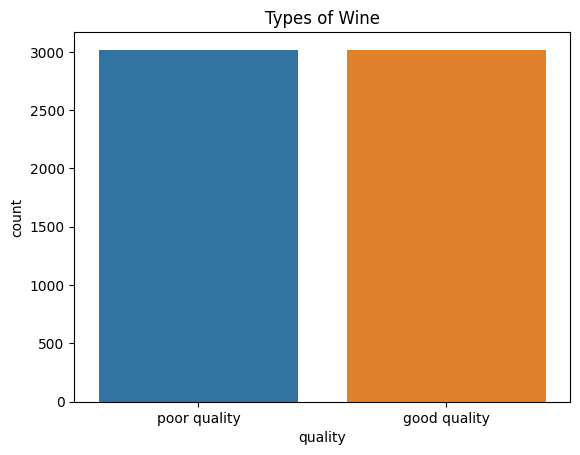

In [15]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

oversample = SMOTE(random_state = 40)
X_os, y_os = oversample.fit_resample(X_train, y_train)
sns.countplot(x=y_os)
plt.xticks([0,1], ['poor quality','good quality'])
plt.title("Types of Wine")
plt.show()

In [16]:
X_train = X_os
X_train
y_train = y_os
y_train

0       0
1       0
2       1
3       0
4       1
       ..
6031    1
6032    1
6033    1
6034    1
6035    1
Name: quality, Length: 6036, dtype: int64

## save data for modeling

In [17]:
os.makedirs('../Capstone_Two_Project/data/processed', exist_ok=True) 
X_train.to_csv("../Capstone_Two_Project/data/processed/X_train.csv")

In [18]:
X_test.to_csv("../Capstone_Two_Project/data/processed/X_test.csv")
y_train.to_csv("../Capstone_Two_Project/data/processed/y_train.csv")
y_test.to_csv("../Capstone_Two_Project/data/processed/y_test.csv")

In [19]:
X_train = pd.read_csv("../Capstone_Two_Project/data/processed/X_train.csv", index_col = 0)
X_train

,alcohol,fixed_acidity_ratio,density,residual_sugar,chlorides,total_sulfur_dioxide
0,0.405797,0.839710,0.130904,0.098160,0.053156,0.258065
1,0.260870,0.845020,0.256217,0.288344,0.074751,0.375576
2,0.304348,0.686411,0.161751,0.018405,0.099668,0.043779
3,0.478261,0.824361,0.084635,0.038344,0.071429,0.419355
4,0.637681,0.851406,0.045306,0.015337,0.059801,0.205069
...,...,...,...,...,...,...
6031,0.492754,0.914611,0.085629,0.015870,0.039605,0.240359
6032,0.343471,0.781272,0.100689,0.032700,0.044016,0.261061
6033,0.695652,0.808453,0.087512,0.105441,0.025885,0.274775
6034,0.672634,0.758345,0.055070,0.023051,0.035275,0.179995


In [20]:
X_test

,alcohol,fixed_acidity_ratio,density,residual_sugar,chlorides,total_sulfur_dioxide
562,0.478261,0.702228,0.148255,0.122699,0.098007,0.327189
2187,0.333333,0.841998,0.134760,0.072086,0.074751,0.357143
3386,0.289855,0.872900,0.139965,0.064417,0.068106,0.331797
2730,0.246377,0.825989,0.159823,0.088957,0.046512,0.357143
4181,0.173913,0.897245,0.159051,0.139571,0.058140,0.211982
...,...,...,...,...,...,...
3762,0.492754,0.944804,0.064006,0.006135,0.053156,0.172811
467,0.579710,0.904303,0.275496,0.079755,0.094684,0.066820
3698,0.449275,0.841461,0.043378,0.004601,0.041528,0.191244
888,0.420290,0.823540,0.221323,0.127301,0.099668,0.076037
